In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns

In [3]:
#  Import and read the heart.csv.
heart = pd.read_csv("data.csv")
heart
#Replacing strings with numbers
gender = {'M': 1,'F': 0}
heart.Sex = [gender[item] for item in heart.Sex]

ex_angina={'N': 1,'Y': 0}
heart.ExerciseAngina = [ex_angina[item] for item in heart.ExerciseAngina]

chest_pain={'ATA': 0,'NAP': 1, 'ASY': 2, 'TA':3 }
heart.ChestPainType = [chest_pain[item] for item in heart.ChestPainType]

rest_ecg={'LVH': 0,'Normal': 1, 'ST': 2 }
heart.RestingECG = [rest_ecg[item] for item in heart.RestingECG]
heart

st_slope={'Down': 0,'Flat': 1, 'Up': 2 }
heart.	ST_Slope = [st_slope[item] for item in heart.ST_Slope]
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,1,172,1,0.0,2,0
1,49,0,1,160,180,0,1,156,1,1.0,1,1
2,37,1,0,130,283,0,2,98,1,0.0,2,0
3,48,0,2,138,214,0,1,108,0,1.5,1,1
4,54,1,1,150,195,0,1,122,1,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,1,1.2,1,1
914,68,1,2,144,193,1,1,141,1,3.4,1,1
915,57,1,2,130,131,0,1,115,0,1.2,1,1
916,57,0,0,130,236,0,0,174,1,0.0,1,1


In [4]:
#cleaning the dataset by removing all zeroes in the column "cholesterol" as there is no 0 cholesterole.
clean_df=heart[heart['Cholesterol'] !=0]
clean_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,1,172,1,0.0,2,0
1,49,0,1,160,180,0,1,156,1,1.0,1,1
2,37,1,0,130,283,0,2,98,1,0.0,2,0
3,48,0,2,138,214,0,1,108,0,1.5,1,1
4,54,1,1,150,195,0,1,122,1,0.0,2,0


In [5]:
#  Group by gender and get the number to plot
distr_gender = clean_df.groupby(["Sex"])
gender_df= pd.DataFrame(distr_gender.size())
gender_df

# Create the dataframe with total count of Female and Male
gender_df.columns = ["Total Count"]
gender_df

,Total Count
Sex,
0,182
1,564


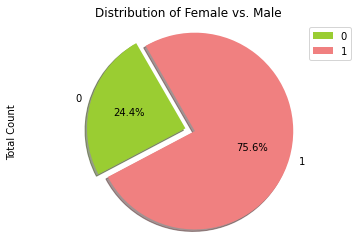

In [6]:
# # Gender Breakdown
colors = ["yellowgreen", "lightcoral"]
#define how the pie will devide/explode
explode = (0.1, 0)
gender_df.plot.pie(y='Total Count', colors = colors, startangle=120, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title("Distribution of Female vs. Male")
plt.axis("equal")
plt.show()

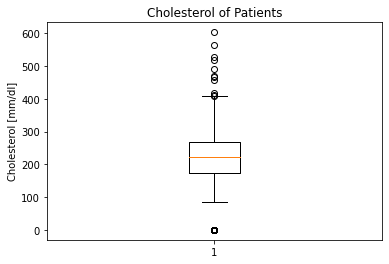

In [7]:
#  look at cholesterol data set and computes quantiles
cholesterol = heart['Cholesterol']
fig1, ax1 = plt.subplots()
ax1.set_title('Cholesterol of Patients')
ax1.set_ylabel('Cholesterol [mm/dl]')
ax1.boxplot(cholesterol)
plt.show()

In [8]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cholesterol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of cholesterol is: {lowerq}")
print(f"The upper quartile of cholesterol is: {upperq}")
print(f"The interquartile range of cholesterol is: {iqr}")
print(f"The the median of cholesterol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of cholesterol is: 173.25
The upper quartile of cholesterol is: 267.0
The interquartile range of cholesterol is: 93.75
The the median of cholesterol is: 223.0 
Values below 32.625 could be outliers.
Values above 407.625 could be outliers.


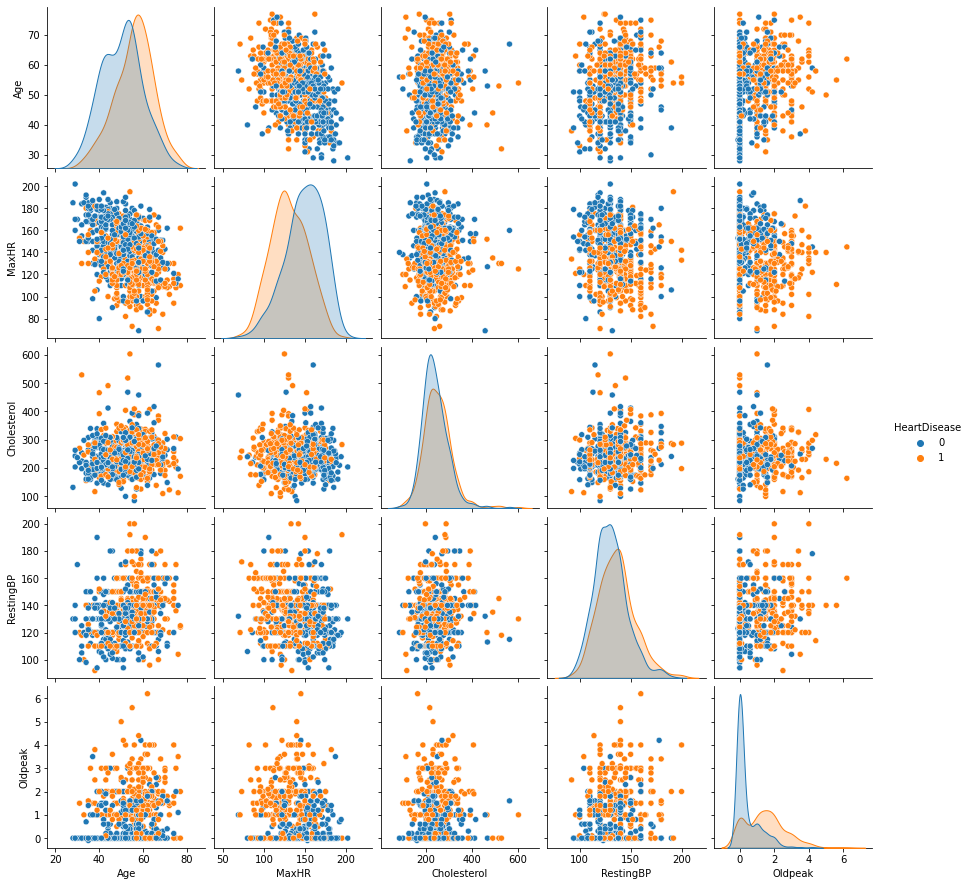

In [9]:
#Pair plot is used to understand the best set of features to explain a relationship 
#between two variables or to form the most separated clusters. It also helps to form 
#some simple classification models by drawing some simple lines or make linear separation
#in our data-set.
#https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6
subData = clean_df[['Age','MaxHR','Cholesterol','RestingBP','Oldpeak', 'HeartDisease']]
sns.pairplot(subData, hue='HeartDisease')